In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения графиков в Colab
%matplotlib inline

print("Библиотеки успешно загружены!")


Библиотеки успешно загружены!


In [2]:
# Загрузка CSV файла
# ВАЖНО: сначала загрузите файл в Colab
from google.colab import files
uploaded = files.upload()

# Чтение файла
import io
# Замените 'train.csv' на имя вашего файла
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
print("Данные загружены!")
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
df.head()


Saving train.csv to train.csv
Данные загружены!
Размер данных: (1309, 28)

Первые 5 строк:


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
# 1. Просмотр информации о данных
print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
df.info()
print("\n=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")
df.describe()

# 2. Проверка пропущенных значений
print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
missing = df.isnull().sum()
print(missing[missing > 0])  # Показываем только колонки с пропусками

# 3. Пример обработки пропусков (если они есть)
# Для числовых колонок
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].mean(), inplace=True)
# Для текстовых колонок
if 'Cabin' in df.columns:
    df['Cabin'].fillna('Unknown', inplace=True)

# 4. Преобразование типов данных (пример)
# df['Column'] = df['Column'].astype('int')  # в целое число
# df['Date'] = pd.to_datetime(df['Date'])    # в дату

# 5. Сохранение обработанных данных
df.to_csv('cleaned_data.csv', index=False)
print("\nОбработанные данные сохранены в cleaned_data.csv")

=== ИНФОРМАЦИЯ О ДАННЫХ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 no

/tmp/ipython-input-3565635384.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


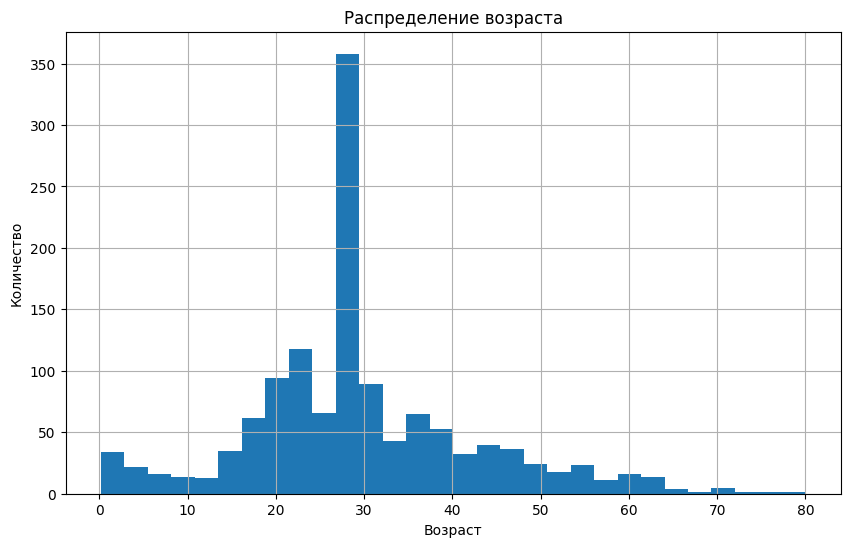

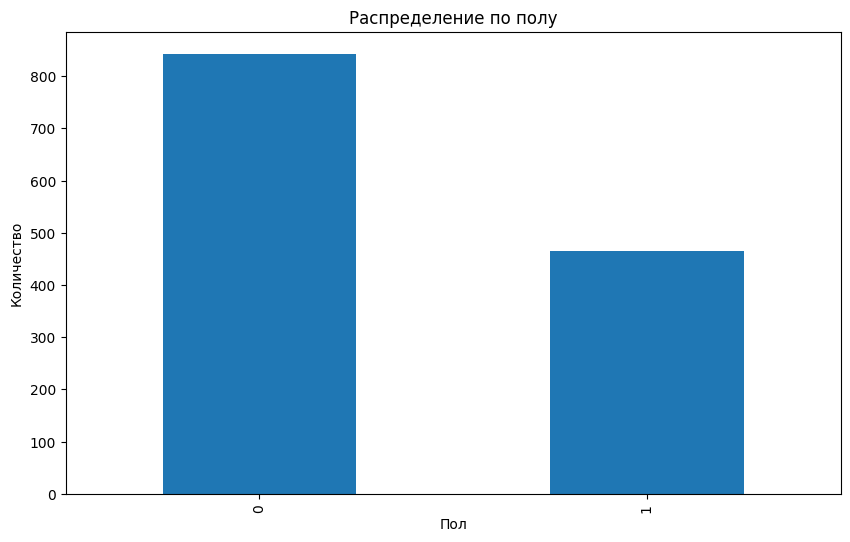

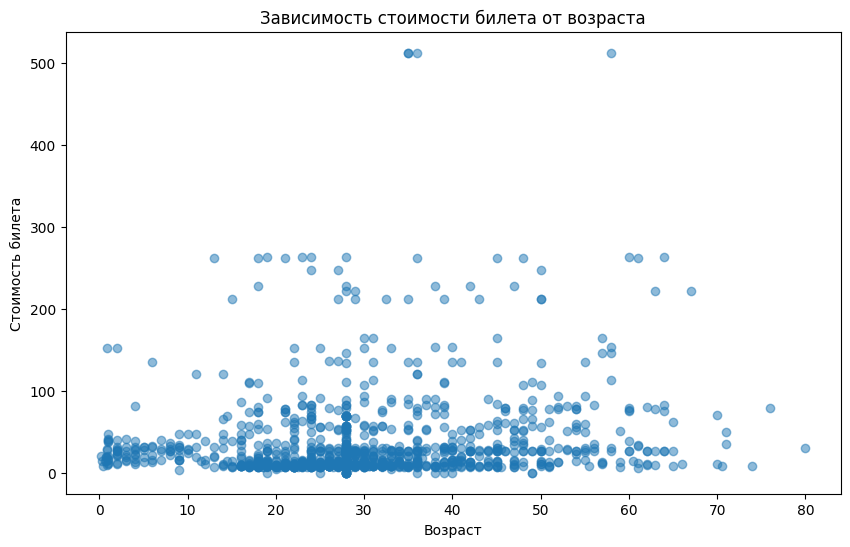

In [4]:
# Пример 1: Гистограмма
plt.figure(figsize=(10, 6))
if 'Age' in df.columns:
    df['Age'].hist(bins=30)
    plt.title('Распределение возраста')
    plt.xlabel('Возраст')
    plt.ylabel('Количество')
    plt.show()

# Пример 2: Столбчатая диаграмма
plt.figure(figsize=(10, 6))
if 'Sex' in df.columns:
    df['Sex'].value_counts().plot(kind='bar')
    plt.title('Распределение по полу')
    plt.xlabel('Пол')
    plt.ylabel('Количество')
    plt.show()

# Пример 3: Диаграмма рассеяния
plt.figure(figsize=(10, 6))
if all(col in df.columns for col in ['Age', 'Fare']):
    plt.scatter(df['Age'], df['Fare'], alpha=0.5)
    plt.title('Зависимость стоимости билета от возраста')
    plt.xlabel('Возраст')
    plt.ylabel('Стоимость билета')
    plt.show()